### How does a coin toss ?

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
g =9.81

In [2]:
def w_relation(u,n):
    return (2*n+0.5)*np.pi*g/(2*u)

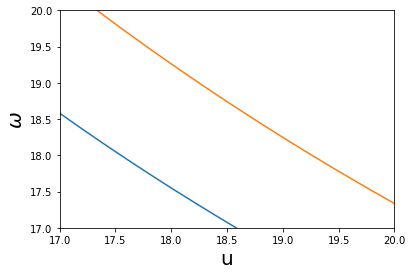

In [3]:
u = np.linspace(0.1,100,1000)
plt.plot(u,w_relation(u,10))
plt.plot(u,w_relation(u,11))
plt.xlim(17,20)
plt.ylim(17,20)
plt.xlabel('u',fontsize=20)
plt.ylabel('$\omega$',fontsize=20)
plt.show()

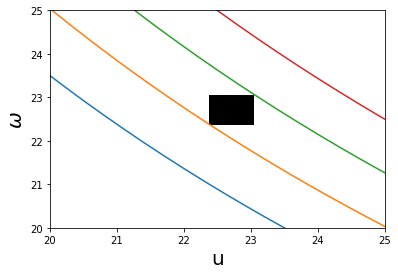

In [4]:
u = np.linspace(0.1,100,1000)
for i in [15,16,17,18]:
    plt.plot(u,w_relation(u,i))
a =22.37
u_0=a
delta_u = 1.4*np.pi*g/(2*np.sqrt(2)*u_0)
rectangle = plt.Rectangle((a, a), delta_u, delta_u,fc='k')
plt.gca().add_patch(rectangle)
plt.xlim(20,25)
plt.ylim(20,25)
plt.xlabel('u',fontsize=20)
plt.ylabel('$\omega$',fontsize=20)
plt.savefig('square.pdf')
plt.show()

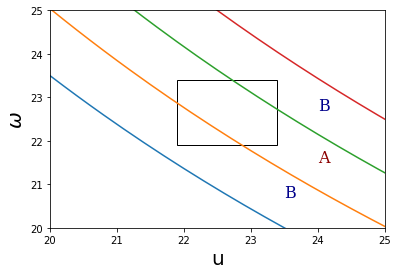

In [5]:
u = np.linspace(0.1,100,1000)
for i in [15,16,17,18]:
    plt.plot(u,w_relation(u,i))
a =21.9
u_0=a
delta_u = 3*np.pi*g/(2*np.sqrt(2)*u_0)
rectangle = plt.Rectangle((a, a), delta_u, delta_u, fill=0,fc='r')
plt.gca().add_patch(rectangle)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
font1 = {'family': 'serif',
         'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
plt.text(24, 21.5, 'A', fontdict=font)
plt.text(24, 22.7, 'B', fontdict=font1)
plt.text(23.5, 20.7, 'B', fontdict=font1)
plt.xlim(20,25)
plt.ylim(20,25)
plt.xlabel('u',fontsize=20)
plt.ylabel('$\omega$',fontsize=20)
plt.savefig('square2.pdf')
plt.show()

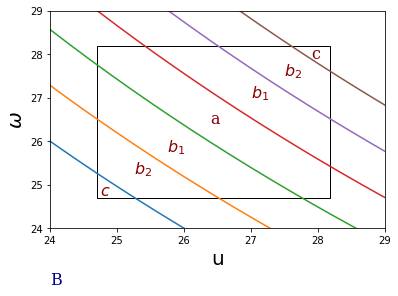

In [6]:
u = np.linspace(0.1,100,1000)
for i in range(20,26):
    plt.plot(u,w_relation(u,i))
a =24.7

u_0=a
delta_u = 7.9*np.pi*g/(2*np.sqrt(2)*u_0)
rectangle = plt.Rectangle((a, a), delta_u, delta_u, fill=0,fc='r')
plt.gca().add_patch(rectangle)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
font1 = {'family': 'serif',
         'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
plt.text(26.4, 26.4, 'a', fontdict=font)
plt.text(27, 27, '$b_1$', fontdict=font)
plt.text(27.5, 27.5, '$b_2$', fontdict=font)
plt.text(25.75, 25.75, '$b_1$', fontdict=font)
plt.text(25.25, 25.25, '$b_2$', fontdict=font)
plt.text(24.75, 24.75, '$c$', fontdict=font)
plt.text(24, 22.7, 'B', fontdict=font1)
plt.text(28-0.1, 28-0.1, 'c', fontdict=font)
plt.xlim(24,29)
plt.ylim(24,29)
plt.xlabel('u',fontsize=20)
plt.ylabel('$\omega$',fontsize=20)
plt.savefig('square3.pdf')
plt.show()

In [7]:
w_relation(w_relation(20,10),10)

20.0

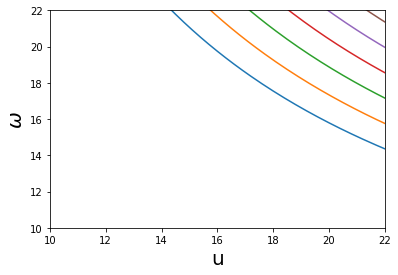

In [8]:
u = np.linspace(0.1,100,1000)
for n in range(10,18):
    plt.plot(u,w_relation(u,n))
plt.xlim(10,22)
plt.ylim(10,22)
plt.xlabel('u',fontsize=20)
plt.ylabel('$\omega$',fontsize=20)
plt.savefig('curvesafar.pdf')
plt.show()

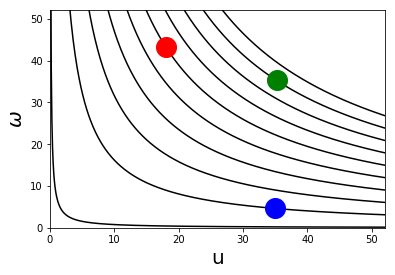

In [31]:
u = np.linspace(0.1,100,1000)
for n in range(0,48,5):
    plt.plot(u,w_relation(u,n),'k')
plt.xlim(0,52)
plt.ylim(0,52)
plt.plot(35, w_relation(35,5), 'bo',markersize=20)
plt.plot(18, w_relation(18,25), 'ro',markersize=20)
plt.plot(35.25, 35.25, 'go',markersize=20)
plt.xlabel('u',fontsize=20)
plt.ylabel('$\omega$',fontsize=20)
plt.savefig('curvesplot2.pdf')
plt.show()

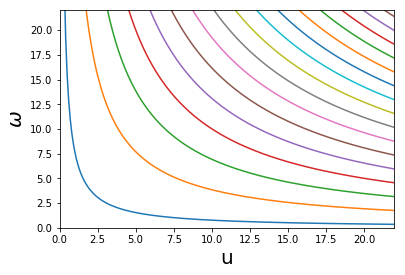

In [30]:
u = np.linspace(0.1,100,1000)
for n in range(18):
    plt.plot(u,w_relation(u,n))
plt.xlim(0,22)
plt.ylim(0,22)
plt.xlabel('u',fontsize=20)
plt.ylabel('$\omega$',fontsize=20)
plt.savefig('curvesplot.pdf')
plt.show()

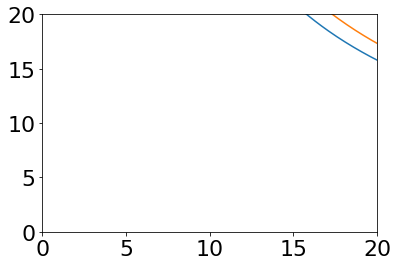

In [14]:
u = np.linspace(0.1,100,1000)
plt.plot(u,w_relation(u,10))
plt.plot(u,w_relation(u,11))
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

In [12]:
u_0=10000

In [13]:
def diag_length(n,u_0 = u_0):
    return (2*n-1)*np.pi*g/(2*np.sqrt(2)*u_0)

In [14]:
def prob_from_diagonals(d,u_0 =u_0):
    
    d_1 = diag_length(1,u_0)
    if d <= d_1:
        return 1
    else:
        return 1- (d-d_1)**2/d**2

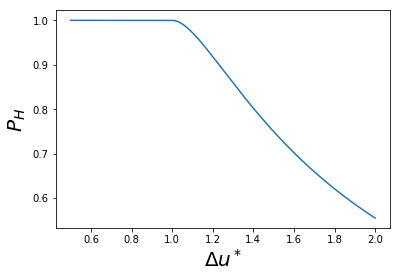

In [15]:
dspace = np.linspace(0,diag_length(2),1000)
scal_factor= (1/diag_length(1))
prob_vector = [prob_from_diagonals(d) for d in dspace]
plt.plot(0.5*(scal_factor*dspace+1), prob_vector)
plt.ylabel('$P_{H}$',fontsize=20)
plt.xlabel('$\Delta u^*$',fontsize=20)
plt.savefig('probfig1.pdf')
plt.show()

In [16]:
min(prob_vector)

0.55555555555555547

In [17]:
def prob_dist(d,u_0 =u_0):
    d_1 = diag_length(1,u_0)
    region_1  = 0.5*(d**2-(d-d_1)**2)
    n = np.floor(0.5*(d/diag_length(1,u_0)+1))
    prob_regions = [region_1]
    for i in range(1,int(n)):
        region_x = (2*d- diag_length(i,u_0)-diag_length(i+1,u_0))*d_1
        prob_regions.append(region_x)
    region_c = 0.5*(d-diag_length(n,u_0))**2
    prob_regions.append(region_c)
    return np.array(prob_regions)/(0.5*d**2)

In [18]:
def plot_prob_dist(d,u_0=u_0):
    d_1 = diag_length(1,u_0)
    if d <= d_1:
        return 1
    return sum(prob_dist(d,u_0)[::2])

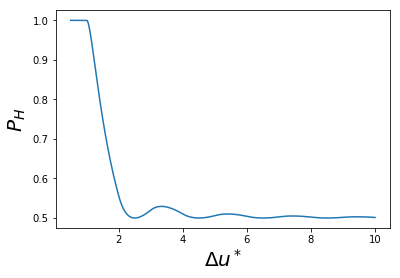

In [19]:
dspace = np.linspace(0,diag_length(10),10000)
plt_vector = [plot_prob_dist(d)  for d in dspace]
plt.plot(0.5*(scal_factor*dspace+1), plt_vector)
plt.ylabel('$P_{H}$',fontsize=20)
plt.xlabel('$\Delta u^*$',fontsize=20)
plt.savefig('probfig2.pdf')
plt.show()

In [86]:
plt_vector[-1]

0.5013850415512466

In [87]:
min(plt_vector)

0.500000000312578